# Pipeline, Feature Union, Custom Transformer

**Plan:**
* Pipeline
* Feature Union
* Custom Transformers

## Pipeline

![alt text](pipeline.jpg)

![alt text](conveyor.jpg)

### Advantages
* Code organization
* Metrics of whole pipeline
* Easier deployment

### Disadvantages:
* Less flexibility

![alt text](https://www.dataschool.io/content/images/2016/08/pipeline_versus_featureunion.jpg)

## Transformer

![alt text](optimus.jpg)

`Transformers` are for pre-processing before modeling.  
`Estimators` (`Models`) are used to make predictions.

## Two ways to create pipeline

### 1. `Pipeline()` class

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

pipe_long = Pipeline([
    ("scaler", MinMaxScaler()), 
    ("svm", SVC())
])
pipe_long.steps

[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]

### 2. `make_pipeline()` function

In [2]:
from sklearn.pipeline import make_pipeline

pipe_short = make_pipeline(MinMaxScaler(), SVC())
pipe_short = make_pipeline(MinMaxScaler(), MinMaxScaler(), SVC())  # name of duplicates
pipe_short.steps

[('minmaxscaler-1', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('minmaxscaler-2', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]

**Names in make_pipeline are taken from types of classes in lowercase**

In [3]:
type(MinMaxScaler()), type(SVC())

(sklearn.preprocessing.data.MinMaxScaler, sklearn.svm.classes.SVC)

## First simple transformer

**Downloading iris dataset**

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

pd.options.mode.chained_assignment = None  # hide unnecessary Pandas notifications

iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


![alt text](http://s5047.pcdn.co/wp-content/uploads/2015/04/iris_petal_sepal.png)

![alt text](http://images.myshared.ru/5/447185/slide_5.jpg)

**What if I don't know how to write classes?**

In [5]:
def make_perfect_array(x):
    x[:,:] *= 0
    return x

In [6]:
from sklearn.preprocessing import FunctionTransformer

pipe = make_pipeline(
    MinMaxScaler(), 
    FunctionTransformer(make_perfect_array)
)

In [7]:
pipe.fit_transform(iris.data)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


**The same without pipeline**

In [8]:
data = MinMaxScaler().fit_transform(iris.data)
FunctionTransformer(make_perfect_array).fit_transform(data)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


**The problem:** `FunctionTransformer` works only with numpy arrays :(  
So we have to write a class to work with Pandas df

**Downloading newsgroups dataset**

In [9]:
from sklearn.datasets import fetch_20newsgroups

fetch_20newsgroups()["target_names"]

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
categories = [
    'rec.autos',
    'sci.med',
    'talk.politics.guns',
]
news_train = fetch_20newsgroups(subset='train', categories=categories)
news_test = fetch_20newsgroups(subset='test', categories=categories)

In [11]:
df = pd.DataFrame(data= np.c_[news_train['data'], news_train['target']],
                  columns=['text','target'])
df.head()

,text,target
0,From: jkjec@westminster.ac.uk (Shazad Barlas)\...,0
1,From: euclid@mrcnext.cso.uiuc.edu (Euclid K.)\...,1
2,From: holland@CS.ColoState.EDU (douglas craig ...,2
3,From: wright@duca.hi.com (David Wright)\nSubje...,1
4,Subject: Re: Non-lethal alternatives to handgu...,2


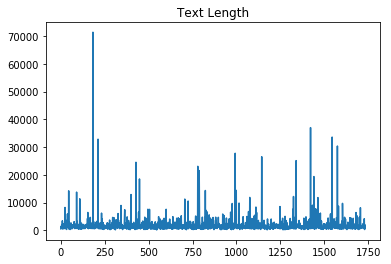

In [12]:
df.text.str.len().plot(title="Text Length")

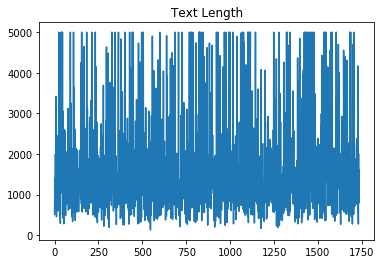

In [13]:
df.text = df.text.str.slice(0, 5000)
df.text.str.len().plot(title="Text Length")

## Pipeline organization

#### 1. If you want to use pipeline as estimator (`predict` method)

All classes, except last, have to have method `transform`. The last one has to have `predict` method.

**Necessary methods:**
* `fit`
    * all classes
* `transform`
    * all except last
* `predict`
    * the last one

#### 2. If you want to use pipline as transformer (`transform` method)

**Necessary methods:**
* `fit`
    * all classes
* `transform`
    * all
* `predict`
    * nowhere (if don't call predict())

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class CutTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, stop: int):
        self.stop = stop

    def fit(self, x, y=None):
        return self
    
    def transform(self, df_x, df_y=None):
        df_x.loc[:, "text"] = df_x.text.str.slice(0, self.stop)
        return df_x

In [15]:
class AutoTransformer(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    
    def transform(self, df_x, df_y=None):
        ar = df_x.text.str.count("auto").astype(float).values
        return ar.reshape(-1, 1)
    
class MedTransformer(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    
    def transform(self, df_x, df_y=None):
        ar = df_x.text.str.count("med").astype(float).values
        return ar.reshape(-1, 1)
    
class GunTransformer(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    
    def transform(self, df_x, df_y=None):
        ar = df_x.text.str.count("gun").astype(float).values
        return ar.reshape(-1, 1)

## FeatureUnion Perfomance

In [16]:
from sklearn.pipeline import FeatureUnion, make_union

union_ = make_union(AutoTransformer(), MedTransformer(), GunTransformer())
df_big = pd.concat([df for _ in range(100)])  # creation of big dataframe

In [17]:
%%timeit
union_.fit_transform(df_big)

941 ms ± 10.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
a = AutoTransformer()
m = MedTransformer()
g = GunTransformer()

In [19]:
%%timeit
a.fit_transform(df_big) 
m.fit_transform(df_big) 
g.fit_transform(df_big) 

933 ms ± 51.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**Another transformer**

In [20]:
class DataFrameTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, name: list):
        self.name = name
        
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, x, y=None):
        return pd.DataFrame(x, columns=self.name)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import MinMaxScaler

union = [("auto", AutoTransformer()), ("med", MedTransformer()), ("gun", GunTransformer())]
names = [name for name, _ in union]

pipe = make_pipeline(
    CutTransformer(5000), 
    FeatureUnion([
        ("auto", AutoTransformer()), 
        ("med", MedTransformer()), 
        ("gun", GunTransformer())
    ]),
    MinMaxScaler(),
    DataFrameTransformer(names),
    RandomForestClassifier(random_state=42)
)

/home/elf/prj/events/2018_09_08_ds_meetup/.env/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
pipe.steps

[('cuttransformer', CutTransformer(stop=5000)),
 ('featureunion', FeatureUnion(n_jobs=1,
         transformer_list=[('auto', AutoTransformer()), ('med', MedTransformer()), ('gun', GunTransformer())],
         transformer_weights=None)),
 ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('dataframetransformer', DataFrameTransformer(name=['auto', 'med', 'gun'])),
 ('randomforestclassifier',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
              oob_score=False, random_state=42, verbose=0, warm_start=False))]

![alt text](img\pipeline_.png)

## Pipleine usage and possibility to change steps

In [23]:
from copy import copy

pipe_ = copy(pipe)
pipe_.fit(df.drop("target", axis=1), df.target)
pipe_.steps[0] = ('cuttransformer', CutTransformer(3000))
pipe_.predict(df)

array(['0', '0', '2', ..., '2', '0', '0'], dtype=object)

**Pipeline parameters**

In [24]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'cuttransformer', 'featureunion', 'minmaxscaler', 'dataframetransformer', 'randomforestclassifier', 'cuttransformer__stop', 'featureunion__n_jobs', 'featureunion__transformer_list', 'featureunion__transformer_weights', 'featureunion__auto', 'featureunion__med', 'featureunion__gun', 'minmaxscaler__copy', 'minmaxscaler__feature_range', 'dataframetransformer__name', 'randomforestclassifier__bootstrap', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier_

**Creating of test dataframe**

In [25]:
df_test = pd.DataFrame(data=np.c_[news_test['data'], news_test['target']],
                       columns=['text','target'])

**Recreating of dataframe just in case**

In [26]:
df = pd.DataFrame(data= np.c_[news_train['data'], news_train['target']],
                  columns=['text','target'])

## Pipeline metrics

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'cuttransformer__stop': [5000, 6000, 7000],
    'randomforestclassifier__max_depth': [4, 5],
    'randomforestclassifier__max_features': [1, 2, 3],
    'randomforestclassifier__n_estimators': [43, 44, 45]
}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(df.drop("target", axis=1), df.target)

print(f"Best params:\n{grid.best_params_}\n")
print(f"Best score: {grid.best_score_:.4f}")
print(f"Score on testset: {grid.score(df_test.drop('target', axis=1), df_test.target):.4f}")

Best params:
{'cuttransformer__stop': 6000, 'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 1, 'randomforestclassifier__n_estimators': 43}

Best score: 0.6280
Score on testset: 0.5484


### Wrong metrics without pipeline

In [28]:
df = pd.DataFrame(data= np.c_[news_train['data'], news_train['target']],
                  columns=['text','target'])
y_train = df.target

In [29]:
df = CutTransformer(6000).fit_transform(df)

**The same that 3 transformers do :)**

In [30]:
cols = ["auto", "med", "gun"]
for col in cols:
    df[col] = df.text.str.count(col)

In [31]:
x_train = MinMaxScaler().fit_transform(df[cols])

In [32]:
from sklearn.model_selection import cross_val_score

param = {
    'max_depth': 5,
    'max_features': 1,
    'n_estimators': 43,
    'random_state': 42
}

score = cross_val_score(RandomForestClassifier(**param), x_train, y_train, cv=5).mean()
print(f"{score:.4f}")

0.6281


## Any combinations of `pipeline` and `feature union`

![SegmentLocal](deeper.gif)

**Result:**
* Pipeline
* Feature Union
* Custom Transformers

In [33]:
get_ipython().system(u'jupyter nbconvert --to script ds_meetup.ipynb')

[NbConvertApp] Converting notebook ds_meetup.ipynb to script
[NbConvertApp] Writing 8484 bytes to ds_meetup.py


# Thank you